## **Task-1(Clustering)**

DBSCAN Silhouette Score for Training Data: 0.4870027859962446
DBSCAN Adjusted Rand Index (ARI): 0.2625285795589985


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-Means Silhouette Score for Training Data: 0.606461845679642
K-Means Adjusted Rand Index (ARI): 0.7492068431726737


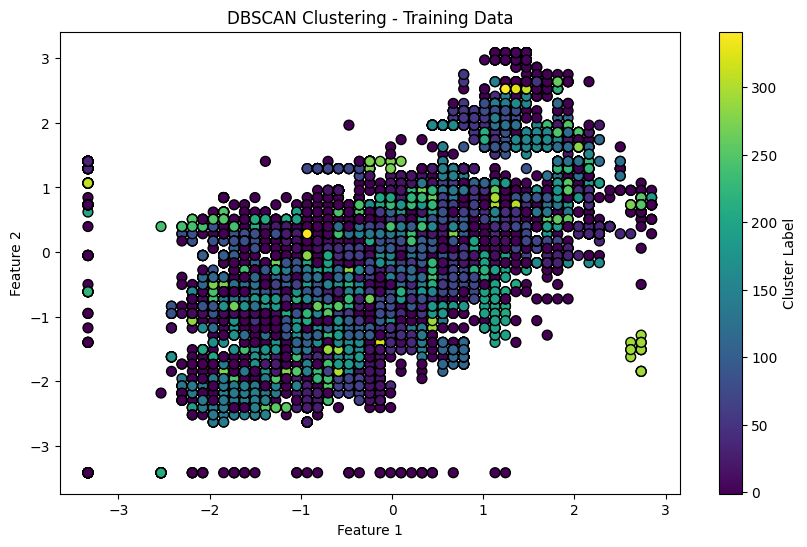

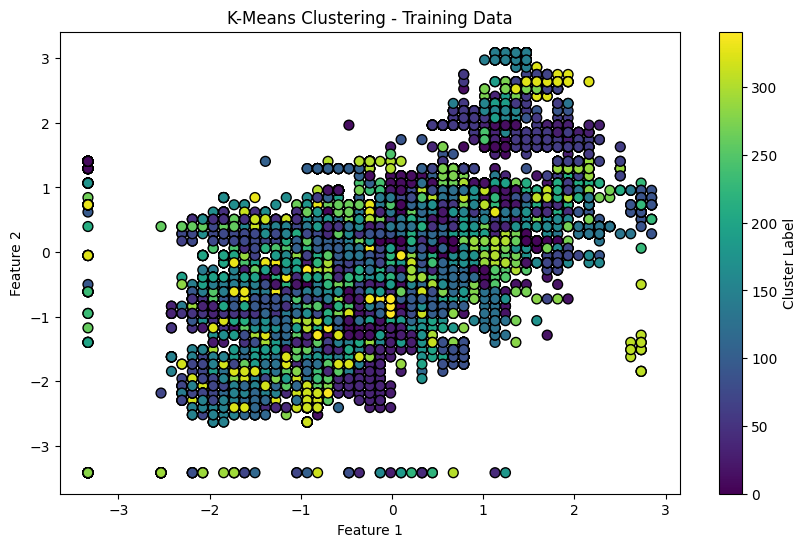

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
import matplotlib.pyplot as plt

# Load the datasets
train_df = pd.read_excel('/content/train.xlsx')
test_df = pd.read_excel('/content/test.xlsx')

# Separate features and target from the training data
X_train = train_df.drop(columns=['target'])

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X_train_scaled)

# Add DBSCAN cluster labels to the train dataset
train_df['DBSCAN_Cluster'] = dbscan_clusters

# Evaluate DBSCAN performance
dbscan_silhouette_avg = silhouette_score(X_train_scaled, dbscan_clusters)
print(f'DBSCAN Silhouette Score for Training Data: {dbscan_silhouette_avg}')

if 'target' in train_df.columns:
    dbscan_ari = adjusted_rand_score(train_df['target'], dbscan_clusters)
    print(f'DBSCAN Adjusted Rand Index (ARI): {dbscan_ari}')

# K-Means Clustering
kmeans = KMeans(n_clusters=len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0), random_state=42)
kmeans_clusters = kmeans.fit_predict(X_train_scaled)

# Add K-Means cluster labels to the train dataset
train_df['KMeans_Cluster'] = kmeans_clusters

# Evaluate K-Means performance
kmeans_silhouette_avg = silhouette_score(X_train_scaled, kmeans_clusters)
print(f'K-Means Silhouette Score for Training Data: {kmeans_silhouette_avg}')

if 'target' in train_df.columns:
    kmeans_ari = adjusted_rand_score(train_df['target'], kmeans_clusters)
    print(f'K-Means Adjusted Rand Index (ARI): {kmeans_ari}')

# Visualization function
def plot_clusters(X, clusters, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Cluster Label')
    plt.show()

# Plotting clusters for DBSCAN
plot_clusters(X_train_scaled[:, :2], dbscan_clusters, 'DBSCAN Clustering - Training Data')

# Plotting clusters for K-Means
plot_clusters(X_train_scaled[:, :2], kmeans_clusters, 'K-Means Clustering - Training Data')

# Process the test dataset with the chosen clustering algorithm (K-Means in this case)
X_test_scaled = scaler.transform(test_df)
test_clusters = kmeans.predict(X_test_scaled)

# Add cluster labels to the test dataset
test_df['KMeans_Cluster'] = test_clusters

# Optional: Save the test dataset with cluster labels to a new file
test_df.to_excel('/content/test_with_clusters.xlsx', index=False)

## **Task-2(Classification)**

In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the train and test datasets
train_df = pd.read_excel('/content/train.xlsx')
test_df = pd.read_excel('/content/test.xlsx')

# Extract features and target from the train dataset
X_train = train_df.drop(columns=['target'])  # Drop 'target' column
y_train = train_df['target']

# Ensure the test dataset has the same features as the training dataset
X_test = test_df[X_train.columns]

# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the train dataset to evaluate accuracy
train_predictions = rf_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print("Train Accuracy:", train_accuracy)

# Predict on the test dataset
test_predictions = rf_classifier.predict(X_test)

# Display train accuracy and test predictions
print("Test Predictions:", test_predictions)




Train Accuracy: 0.9994286025250326
Test Predictions: ['B74' 'A10' 'B65' ... 'B69' 'A38' 'A80']


In [19]:
# Save the test predictions to a new file
test_df['Predictions'] = test_predictions  # Add predictions to the test DataFrame
test_df.to_excel('/content/test_predictions.xlsx', index=False)  # Save to Excel

print("Test predictions saved to 'test_predictions.xlsx'.")

Test predictions saved to 'test_predictions.xlsx'.
